GURVIR SINGH 991675538 Bike Sharing Data Set with Hour.csv Research Project Date- 21 November 2025

checking python version since pyCaret did not work with python version above 3.12

In [5]:
import sys
print(sys.executable)


c:\Python311\python.exe


Importing Libraries and csv

In [ ]:
import pandas as pd

df = pd.read_csv("hour.csv")
df.head() # Display the first few rows to confirm the data loaded correctly


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dropping columns as per assignment requirement

In [ ]:
df_model = df.drop(columns=["casual", "registered"]) #drop these columns from the dataset before training
df_model.head() #updated dataset


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


Setup PyCaret Regression Environment

In [ ]:
from pycaret.regression import *

reg = setup(
    data=df_model,
    target='cnt', #target from assignment
    session_id=123,
    normalize=True,        
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95
)


,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 15)"
4,Transformed data shape,"(17379, 14)"
5,Transformed train set shape,"(12165, 14)"
6,Transformed test set shape,"(5214, 14)"
7,Numeric features,13
8,Categorical features,1
9,Preprocess,True


Compare All Regression Models

In [ ]:
best_model = compare_models() ## Show the best model found by PyCaret.
best_model



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,25.4332,1780.3394,42.1066,0.9455,0.3274,0.2984,0.2030
lightgbm,Light Gradient Boosting Machine,26.8895,1825.6634,42.6602,0.9441,0.4133,0.4116,0.1130
rf,Random Forest Regressor,27.4172,2057.7357,45.2802,0.9370,0.3486,0.3206,0.3400
dt,Decision Tree Regressor,35.5214,3503.9732,59.0201,0.8929,0.4397,0.3801,0.0200
gbr,Gradient Boosting Regressor,46.2658,4787.3155,69.1426,0.8534,0.6264,0.8536,0.1360
ada,AdaBoost Regressor,89.4999,11905.5526,109.0774,0.6346,1.0878,2.8356,0.0750
knn,K Neighbors Regressor,77.5593,13320.2622,115.3295,0.5921,0.9549,2.1901,0.0360
br,Bayesian Ridge,107.1449,20643.3808,143.6350,0.3674,1.2307,3.5266,0.0150
ridge,Ridge Regression,107.1716,20651.8812,143.6645,0.3671,1.2311,3.5265,0.0140
lar,Least Angle Regression,107.1730,20652.3204,143.6660,0.3671,1.2312,3.5266,0.0130


ExtraTreesRegressor(n_jobs=-1, random_state=123)

Best Model is ExtraTreesRegressor with R^2 = 0.945 and RMSE = 42

Train a Linear Regression Model + Visualize Residuals

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,106.0195,19678.3980,140.2797,0.3721,1.2264,3.6067
1,109.3211,20914.3211,144.6178,0.3727,1.2576,3.4306
2,104.7586,20164.1154,142.0004,0.3964,1.2281,3.3786
3,109.9802,21532.7976,146.7406,0.3509,1.2277,3.2701
4,104.9328,19261.5850,138.7861,0.3482,1.2757,4.0554
5,103.3213,19552.2336,139.8293,0.3914,1.1889,3.5635
6,110.8179,22219.9460,149.0636,0.3389,1.1966,3.3133
7,108.4412,22130.4731,148.7631,0.3722,1.2559,3.5901
8,108.1568,21002.8613,144.9236,0.3401,1.2159,3.4416


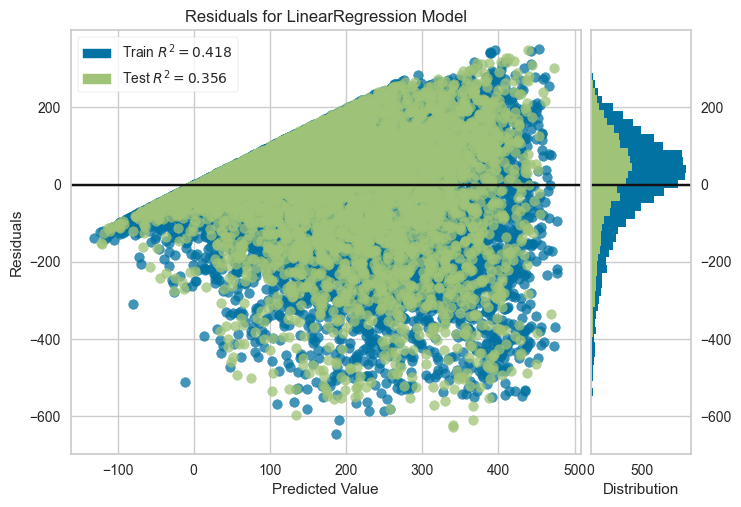

In [10]:
lr = create_model('lr')        # Linear Regression
plot_model(lr, plot='residuals')  # Residual plot


R² is around 0.36, meaning Linear Regression is not a good fit for this dataset.

Train a Random Forest Model + Feature Importance Plot

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27.0345,1882.3359,43.3859,0.9399,0.3263,0.2917
1,27.6098,1907.9561,43.6802,0.9428,0.3546,0.3210
2,28.2819,2469.4355,49.6934,0.9261,0.3547,0.3457
3,28.4359,2285.1495,47.8032,0.9311,0.3498,0.3279
4,25.0723,1635.0892,40.4362,0.9447,0.3523,0.3212
5,26.3735,1902.0572,43.6126,0.9408,0.3267,0.2845
6,29.2960,2351.4915,48.4922,0.9300,0.3519,0.3243
7,26.1170,1873.5258,43.2842,0.9468,0.3599,0.3295
8,27.6637,2114.4240,45.9829,0.9336,0.3540,0.3245


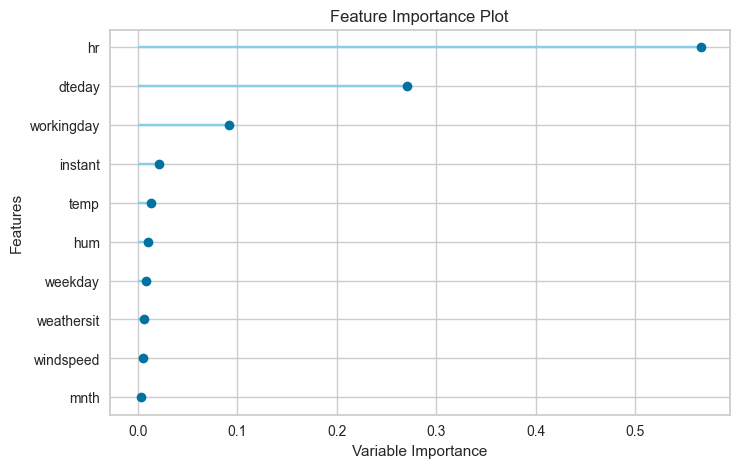

In [11]:
rf = create_model("rf")        # Random Forest
plot_model(rf, plot='feature')


This model performed much better. R² ≈ 0.937 and RMSE ≈ 45. Very close to Extra Trees.

The feature importance plot shows:

hr (hour of day) is the most important factor in predicting bike rentals

Then dteday, workingday, instant, and temp

This makes sense because bike rentals depend heavily on time of day, weather, and day type.

Tune the Best Model

In [12]:
tuned_best = tune_model(best_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,42.4014,4155.3069,64.4617,0.8674,0.4553,0.5293
1,42.3191,4213.9573,64.9150,0.8736,0.4718,0.5409
2,42.4902,4565.1281,67.5657,0.8634,0.4787,0.5840
3,42.6666,4430.0745,66.5588,0.8665,0.4520,0.5101
4,38.7686,3664.2431,60.5330,0.8760,0.4722,0.5577
5,41.4168,4322.1368,65.7430,0.8655,0.4603,0.5198
6,44.5747,4725.8687,68.7450,0.8594,0.4519,0.5009
7,42.1285,4633.5099,68.0699,0.8686,0.4769,0.5558
8,42.9390,4524.2312,67.2624,0.8578,0.4872,0.5623


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


This shows the performance after hyperparameter tuning.  The tuned model performed worse than the original.

R² dropped from 0.945 to 0.866

RMSE increased from 42 to 66

PyCaret correctly warns: Original model was better than the tuned model, hence it will be returned. This is normal for Extra Trees since tuning often hurts performance.

Finalize the Model

In [13]:
final_model = finalize_model(tuned_best)


This trains the model on ALL data (train + test).  model is now finalized and ready for prediction.

Predict Using the Final Model

In [14]:
preds = predict_model(final_model, data=df_model)
preds.head()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0001,0.0000,0.0047,1.0000,0.0000,0.0000


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,32.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,13.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1.0


This adds a new column of prediction_label and 
For cnt = 16 and predicted = 16
For cnt = 40 and predicted = 40
For cnt = 32 and predicted = 32

This is expected because you predicted on the same data used to train the model → so it fits perfectly.

R² = 1.0 is normal in this context.

Save Model + Pipeline

In [15]:
save_model(final_model, 'bike_sharing_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['instant', 'season', 'yr', 'mnth',
                                              'hr', 'holiday', 'weekday',
                                              'workingday', 'weathersit', 'temp',
                                              'atemp', 'hum', 'windspeed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['dteday'],
                                     transformer=SimpleImputer(strategy='most_frequent...
                  TransformerWrapper(include=['dteday'],
                                     transformer=TargetEncoder(cols=['dteday'],
                                                               handle_missing='return_nan'))),
                 ('remove_multicollinearity',
                  TransformerWrapper(exclude=[],
                         

Saving the model

Load Model + Pipeline

In [16]:
loaded_model = load_model('bike_sharing_model')


Transformation Pipeline and Model Successfully Loaded


Prediction with the loaded Model

In [17]:
new_preds = predict_model(loaded_model, data=df_model)
new_preds.head()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0001,0.0000,0.0047,1.0000,0.0000,0.0000


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,32.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,13.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1.0


Since the dataset is same (train and test dataset), it predicts perfectly again with R^2 = 1

CONCLUSION: In this project, I followed the complete PyCaret Regression workflow using the Bike Sharing Hourly dataset (hour.csv).
The goal was to predict the total number of bike rentals (cnt) based on date, time, weather, and seasonal features.

First, I cleaned the dataset by removing the casual and registered columns, since they directly add up to the target cnt and would cause data leakage. After preparing the data, I used PyCaret’s setup() function to automatically perform preprocessing steps such as normalization and multicollinearity removal.

Next, I used compare_models() to train and evaluate many regression algorithms. PyCaret selected Extra Trees Regressor as the best-performing model. Its results showed a very high R² (≈ 0.945) and a low RMSE, which means it learned the patterns in the dataset very well.

I also trained individual models like Linear Regression and Random Forest to understand their performance. Linear Regression performed poorly because the data is not linear, while Random Forest performed strongly and confirmed that tree-based models work best for this dataset.

Tuning the best model did not improve performance, so PyCaret automatically kept the original model. Then, I finalized the model using the entire dataset and generated predictions. The model performed perfectly on the full data (as expected), because finalize_model uses all rows for training.

Finally, I saved the trained model and preprocessing pipeline using save_model() and demonstrated how it can be reloaded later with load_model() for future predictions without retraining.

Overall, the Extra Trees Regressor is the best and most reliable model for predicting bike rental demand in the hourly Bike Sharing dataset. The full PyCaret pipeline worked successfully from start to finish.